<h1><center>Supervised ML in HR - practical case study </center></h1>

Project Overview
The project aims to analyze employee attrition, focusing on identifying patterns and key factors influencing employees' decisions to leave the organization. The objective is to provide actionable insights into which employee groups are more likely to resign.

Dependent Variable: Attrition
The primary focus is on the binary variable "Attrition," indicating whether an employee resigned in the previous year.

Data Exploration
The project utilizes a curated dataset, accessible here (https://www.kaggle.com/traceyskagglist/hr-analytics-case-study-copy-for-class?fbclid=IwAR0EzeeOi2T8ewHHT-D_hPG7reGH9NAWW5ETlo18ViHV72tdLMaQWDno9FU), for a detailed exploration of employee behavior and characteristics.

Machine Learning Methods
The analysis employs supervised machine learning, with logistic regression as the primary model. Logistic regression is chosen for its effectiveness in binary classification tasks, allowing the prediction of attrition likelihood based on various features in the dataset.

HR Implications
The project's significance lies in its practical application for Human Resources (HR) professionals. By uncovering factors associated with attrition, HR teams gain valuable insights to implement targeted retention strategies. This understanding enables organizations to proactively address the needs of specific employee groups, fostering a workplace that attracts and retains top talent.

In summary, the project bridges data science and HR, offering concrete insights to enhance workforce management and create a resilient, productive organizational environment.

### Necessary packages

In [1]:
import pandas as pd  # Importing pandas for data manipulation
import numpy as np   # Importing numpy for array operations
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
import sklearn.metrics as metrics  # Importing scikit-learn metrics module for evaluating model performance


### Necessary functions

In [2]:
# Used Functions
from sklearn.model_selection import train_test_split  # Function for splitting data into training and testing sets
from sklearn.metrics import mean_squared_error  # Mean Squared Error (MSE) metric
from itertools import product  # For expanding the grid
from sklearn.model_selection import GridSearchCV  # For necessary parameter tuning
from sklearn.metrics import plot_confusion_matrix  # For generating a confusion matrix
from sklearn.datasets import make_classification  # For generating synthetic classification data
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score  # For determining model accuracy
from sklearn import metrics  # General metrics for model evaluation
import statsmodels.api as smf  # An alternative to modeling using scikit-learn
from sklearn.pipeline import *  # For creating a pipeline of data processing steps
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
from sklearn.preprocessing import StandardScaler  # For standardizing features

# Used Models
from sklearn.metrics import confusion_matrix  # Confusion matrix for evaluating classification models
from sklearn.linear_model import LogisticRegression  # Logistic Regression model


### EDA - Exploratory Data Analysis

In [3]:
data_path = "C:/Users/fstarek/Documents/general_data.csv"
data_dummy = pd.read_csv(data_path)

# Variable Adjustment - Converting 'object' type to 'int64'
# Creating dictionaries for mapping
travel_mapping = {'Travel_Rarely': 2, 'Travel_Frequently': 3, 'Non-Travel': 1}
gender_mapping = {'Male': 1, 'Female': 2}
department_mapping = {'Sales': 2, 'Research & Development': 3, 'Human Resources': 1}
educationf_mapping = {'Life Sciences': 2, 'Other': 3, 'Medical': 1, 'Marketing': 4, 'Technical Degree': 5, 'Human Resources': 6}
married_mapping = {'Married': 2, 'Single': 3, 'Divorced': 1}

# Assigning values from dictionaries to variables
data_dummy['BusinessTravel'] = data_dummy['BusinessTravel'].map(travel_mapping)
data_dummy['Gender'] = data_dummy['Gender'].map(gender_mapping)
data_dummy['Department'] = data_dummy['Department'].map(department_mapping)
data_dummy['EducationField'] = data_dummy['EducationField'].map(educationf_mapping)
data_dummy['MaritalStatus'] = data_dummy['MaritalStatus'].map(married_mapping)

data_dummy.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,2,2,6,2,2,1,1,2,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,3,3,10,1,2,1,2,2,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,3,3,17,4,3,1,3,1,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,1,3,2,5,2,1,4,1,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,2,3,10,1,1,1,5,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
data_dummy.JobRole.unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

In [64]:
data_dummy.info() #We are looking for non-int64 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   int64  
 3   Department               4410 non-null   int64  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   int64  
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   int64  
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [8]:
data_dummy['NumCompaniesWorked'] = data_dummy['NumCompaniesWorked'].replace(np.nan, 0)
data_dummy['TotalWorkingYears'] = data_dummy['TotalWorkingYears'].replace(np.nan, 0)
print(data_dummy.isnull().sum())

#To continue further we need to get rid of all NaN values

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


In [5]:
data_dummy.describe() 

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.00000,4410.0,4410.000000,4410.000000,4410.000000,...,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,2.086395,2.610884,9.192517,2.912925,2.29932,1.0,2205.500000,1.400000,2.063946,...,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,0.532049,0.568764,8.105026,1.023933,1.34794,0.0,1273.201673,0.489954,1.106689,...,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.00000,1.0,1103.250000,1.000000,1.000000,...,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,2.000000,3.000000,7.000000,3.000000,2.00000,1.0,2205.500000,1.000000,2.000000,...,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,2.000000,3.000000,14.000000,4.000000,3.00000,1.0,3307.750000,2.000000,3.000000,...,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,3.000000,3.000000,29.000000,5.000000,6.00000,1.0,4410.000000,2.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


### Data preprocessing
###### We are trying to create "an ideal" dataset for our ML model

In [6]:
#Thanks to our EDA we can see, that these variables are not relevant for our model
data_dummy.drop(['Over18', 'EmployeeCount', 'StandardHours',"JobRole","EmployeeID"], inplace=True, axis = 1)
data_dummy.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,2,2,6,2,2,2,1,2,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,3,3,10,1,2,2,1,3,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,3,3,17,4,3,1,4,2,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,1,3,2,5,2,1,3,2,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,2,3,10,1,1,1,1,3,23420,4.0,12,2,9.0,2,6,0,4


##### Creating Equidistant Intervals for the Attribute Age (Intervals of 9 Years)


In [68]:
data_dummy['Age_eqdist'] = pd.cut(data_dummy.Age,bins=5,precision=0)
data_dummy['Age_eqdist'] = data_dummy['Age_eqdist'].astype(str)
data_dummy['Age_eqdist']

0       (43.0, 52.0]
1       (26.0, 35.0]
2       (26.0, 35.0]
3       (35.0, 43.0]
4       (26.0, 35.0]
            ...     
4405    (35.0, 43.0]
4406    (26.0, 35.0]
4407    (18.0, 26.0]
4408    (35.0, 43.0]
4409    (35.0, 43.0]
Name: Age_eqdist, Length: 4410, dtype: object

##### Transforming Intervals into Numbers 1 to 5 for Easier Processing in Modeling


In [69]:
data_dummy['Age_eqdist'] = data_dummy['Age_eqdist'].map({'(18.0, 26.0]': 1, '(26.0, 35.0]': 2, '(35.0, 43.0]': 3, '(43.0, 52.0]': 4, '(52.0, 60.0]': 5 })
data_dummy.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Age_eqdist
0,51,No,2,2,6,2,2,2,1,2,131160,1.0,11,0,1.0,6,1,0,0,4
1,31,Yes,3,3,10,1,2,2,1,3,41890,0.0,23,1,6.0,3,5,1,4,2
2,32,No,3,3,17,4,3,1,4,2,193280,1.0,15,3,5.0,2,5,0,3,2
3,38,No,1,3,2,5,2,1,3,2,83210,3.0,11,3,13.0,5,8,7,5,3
4,32,No,2,3,10,1,1,1,1,3,23420,4.0,12,2,9.0,2,6,0,4,2


In [7]:
print(data_dummy.isnull().sum()) #Last check of NaN values

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


### Graphs

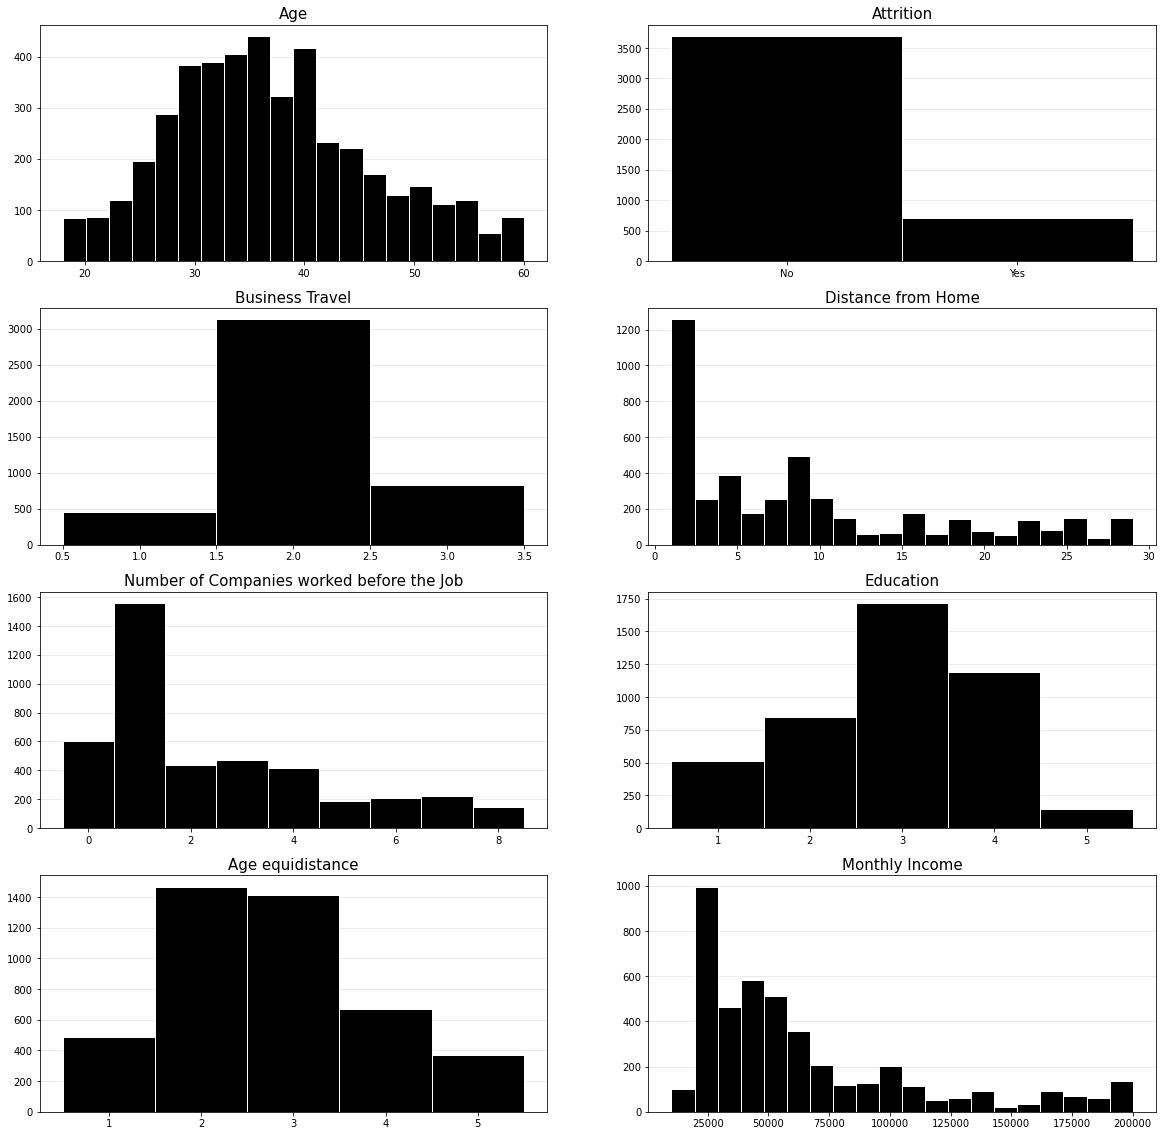

In [71]:
fig = plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
plt.hist(data_dummy['Age'], bins = 20, color = 'black', zorder = 3, edgecolor = 'white')
plt.title('Age', size = 15)
plt.grid(True, axis = 'y', zorder = 0, alpha = 0.3)

plt.subplot(4,2,2)
plt.hist(data_dummy['Attrition'], bins = np.arange(3)-0.5, color = 'black', zorder = 3, edgecolor = 'white')
plt.title('Attrition', zorder = 0, size = 15)
plt.grid(True, axis = 'y', zorder = 0, alpha = 0.3)

plt.subplot(4,2,3)
plt.hist(data_dummy['BusinessTravel'], bins = np.arange(4)+0.5, color = 'black', zorder = 3, edgecolor = 'white')
plt.title('Business Travel', zorder = 0, size = 15)
plt.grid(True, axis = 'y', zorder = 0, alpha = 0.3)

plt.subplot(4,2,4)
plt.hist(data_dummy['DistanceFromHome'], bins = 20, color = 'black', zorder = 3, edgecolor = 'white')
plt.title('Distance from Home', size = 15)
plt.grid(True, axis = 'y', zorder = 0)
plt.grid(True, axis = 'y', zorder = 0, alpha = 0.3)

plt.subplot(4,2,5)
plt.hist(data_dummy['NumCompaniesWorked'],bins = np.arange(10)-0.5,  color = 'black', zorder = 3, edgecolor = 'white')
plt.title('Number of Companies worked before the Job', size = 15)
plt.grid(True, axis = 'y', zorder = 0)
plt.grid(True, axis = 'y', zorder = 0, alpha = 0.3)

plt.subplot(4,2,6)
plt.hist(data_dummy['Education'], bins = np.arange(6)+0.5, color = 'black', zorder = 3, edgecolor = 'white')
plt.title('Education', size = 15)
plt.grid(True, axis = 'y', zorder = 0)
plt.grid(True, axis = 'y', zorder = 0, alpha = 0.3)

plt.subplot(4,2,7)
plt.hist(data_dummy['Age_eqdist'], bins = np.arange(6)+0.5, color = 'black', zorder = 3, edgecolor = 'white')
plt.title('Age equidistance', size = 15)
plt.grid(True, axis = 'y', zorder = 0)
plt.grid(True, axis = 'y', zorder = 0, alpha = 0.3)

plt.subplot(4,2,8)
plt.hist(data_dummy['MonthlyIncome'], bins = 20, color = 'black', zorder = 3, edgecolor = 'white')
plt.title('Monthly Income', zorder = 0, size = 15)
plt.grid(True, axis = 'y', zorder = 0, alpha = 0.3)

plt.show()

##### Changing the Target Variable Column from Yes/No to True/False


In [9]:
data_dummy['Attrition'] = data_dummy['Attrition'].map({'Yes': True, 'No': False})
data_dummy.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,False,2,2,6,2,2,2,1,2,131160,1.0,11,0,1.0,6,1,0,0
1,31,True,3,3,10,1,2,2,1,3,41890,0.0,23,1,6.0,3,5,1,4
2,32,False,3,3,17,4,3,1,4,2,193280,1.0,15,3,5.0,2,5,0,3
3,38,False,1,3,2,5,2,1,3,2,83210,3.0,11,3,13.0,5,8,7,5
4,32,False,2,3,10,1,1,1,1,3,23420,4.0,12,2,9.0,2,6,0,4


### ML model - Logistic Regression

##### In this dataset, we have chosen the supervised method of logistic regression. The main reason for this choice was because our target attribute is binary (True/False). In addition the logistic regression works well with our dataset, because we have small number of features, thus making it less likely to be overfitted. 
##### For our train/test set, we have chosen the 80/20 ratio of split.

In [10]:
SEED=42

#Train/test set
train_ratio = 0.8
test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    data_dummy.drop(['Attrition'], axis = 1), # Vysvětlující proměná
    data_dummy[['Attrition']], # Vysvětlovaná proměná
    test_size = test_ratio, #Velikost
    random_state = SEED
    )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3528, 18)
(882, 18)
(3528, 1)
(882, 1)


In [11]:
#Ratios of the split datasets
print(y_train.value_counts())
print(y_test.value_counts())

Attrition
False        2958
True          570
dtype: int64
Attrition
False        741
True         141
dtype: int64


##### Tvorba modelu LOGIT

In [12]:
# Model Creation - Logistic Regression
# Creating a pipeline for Logistic Regression with feature scaling
pipelineLR = make_pipeline(StandardScaler(), LogisticRegression(random_state=SEED, penalty='l1', solver='liblinear', max_iter=1000))

# Grid of Parameter Values for Grid Search
param_grid_lr = [{'logisticregression__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]}]

# Estimator for Grid Search and Cross-validation
gsLR = GridSearchCV(estimator=pipelineLR,
                    param_grid=param_grid_lr,
                    scoring='accuracy',
                    cv=5,
                    refit=True,
                    n_jobs=1)

# Training Logistic Regression
gsLR = gsLR.fit(X_train, y_train)

# Training score of the best model
print(gsLR.best_score_)

# Parameters of the best model
print(gsLR.best_params_)

# Testing score of the best model
clfLR = gsLR.best_estimator_
print('Test accuracy: %.3f' % clfLR.score(X_test, y_test))


C:\Users\fstarek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fstarek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fstarek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fstarek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8500596709059127
{'logisticregression__C': 10.0}
Test accuracy: 0.846


C:\Users\fstarek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fstarek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fstarek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fstarek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

##### Confusion Matrix

C:\Users\fstarek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x1080 with 0 Axes>

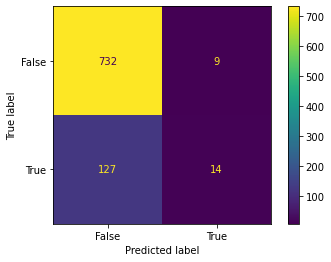

In [14]:
fig = plt.figure(figsize=(15,15))
plot_confusion_matrix(gsLR, X_test,y_test)  
y_pred_log = clfLR.predict(X_test)
plt.show()
#The confusion matrix is a compact visual summary of a classification model's performance, neatly presenting true positives, true negatives, false positives, and false negatives

In [15]:
cnf_log=confusion_matrix(y_test,y_pred_log)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log)) # ((TP+TN)/total) 
print("Precision:",metrics.precision_score(y_test, y_pred_log)) # (TP/(TP + FP)) 
print("Recall:",metrics.recall_score(y_test, y_pred_log)) # (TP/(TP + FN)) 
print("False Negative Rate:",cnf_log[1,0]/cnf_log.sum()) # (TP/(TP + FN))

Accuracy: 0.8458049886621315
Precision: 0.6086956521739131
Recall: 0.09929078014184398
False Negative Rate: 0.14399092970521543


##### ROC curve
###### The ROC (Receiver Operating Characteristic) curve describes the quality of a binary classifier based on the settings of its classification threshold. It illustrates the trade-off between sensitivity and specificity, allowing an analysis of how the model performs at different levels of recognizing positive and negative cases.


In [78]:
y_proba_log = gsLR.predict_proba(X_test)[::,1]
fpr_log, tpr_log, threshold_log = metrics.roc_curve(y_test, y_proba_log)

auc = metrics.roc_auc_score(y_test, y_proba_log)


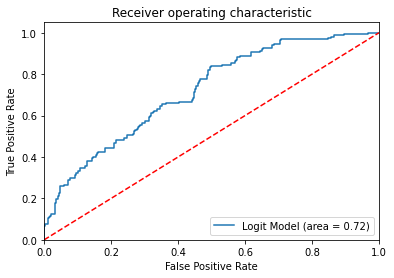

In [45]:
from sklearn.metrics import *
logit_roc_auc = roc_auc_score(y_test, y_proba_log)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)
plt.figure()
plt.plot(fpr, tpr, label='Logit Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Logit_ROC')
plt.show()


#####  PROBIT Model Creation
###### In statistical modeling, a PROBIT model is being constructed, similar to the LOGIT model, for binary classification tasks. Notably, the PROBIT model utilizes the probit function, providing an alternative to logistic regression in estimating the probability of event occurrence. The distinction between the two lies in the mathematical function employed to model the relationship between predictors and binary outcomes.

In [16]:
#Train/test set
X_train, X_test, y_train, y_test = train_test_split(
    data_dummy.drop(['Attrition'], axis = 1), 
    data_dummy[['Attrition']], 
    test_size = test_ratio,
    random_state = SEED
    )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3528, 18)
(882, 18)
(3528, 1)
(882, 1)


In [18]:

plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

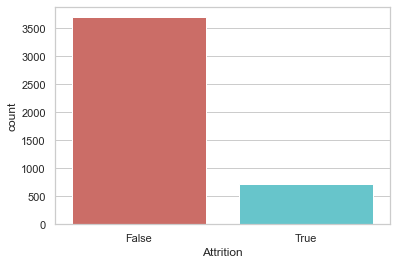

<Figure size 432x288 with 0 Axes>

In [19]:
sns.countplot(x='Attrition', data=data_dummy, palette='hls')
plt.show()
plt.savefig('count_plot')

In [329]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


##### Over-sampling using SMOTE
With our training data created, I’ll up-sample the default class using the SMOTE algorithm (Synthetic Minority Oversampling Technique). At a high level, SMOTE:

1. Works by creating synthetic samples from the minor class (default) instead of creating copies.
2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [20]:
X = data_dummy.loc[:, data_dummy.columns != 'Attrition']
y = data_dummy.loc[:, data_dummy.columns == 'Attrition']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
columns = X_train.columns
os_data_X,os_data_y = os.fit_resample(X_train, y_train)

In [22]:
cols = ['Age','BusinessTravel','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']
X = os_data_X[cols]
y = os_data_y['Attrition']

##### Implementing the model

In [23]:
import statsmodels.api as smf
probit_model = smf.Probit(y,X)
result = probit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.618597
         Iterations 5
                            Results: Probit
Model:                Probit             Pseudo R-squared:   0.108      
Dependent Variable:   Attrition          AIC:                6157.5356  
Date:                 2023-11-09 11:41   BIC:                6242.1442  
No. Observations:     4956               Log-Likelihood:     -3065.8    
Df Model:             12                 LL-Null:            -3435.2    
Df Residuals:         4943               LLR p-value:        2.0230e-150
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       5.0000                                            
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Age                     -0.0108   0.0026  -4.1419 0

##### Probit Model Fitting

In [24]:
probit=smf.Probit(y_train,X_train)
probit.fit()
print(probit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.388284
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.388284
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 2954
Model:                         Probit   Df Residuals:                     2936
Method:                           MLE   Df Model:                           17
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1206
Time:                        11:41:36   Log-Likelihood:                -1147.0
converged:                       True   LL-Null:                       -1304.3
Covariance Type:            nonrobust   LLR p-value:                 1.032e-56
                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

##### Extracting the model parameters

In [25]:
params = pd.DataFrame(probit.fit().params,columns={'coef'},)
params

Optimization terminated successfully.
         Current function value: 0.388284
         Iterations 6


,coef
Age,-2.859719e-02
BusinessTravel,2.728746e-01
Department,-1.424361e-01
DistanceFromHome,2.780162e-03
Education,-1.710524e-02
EducationField,-2.263390e-02
Gender,-1.335829e-01
JobLevel,-4.404531e-02
MaritalStatus,3.117312e-01
MonthlyIncome,-6.477964e-07


##### Predicting using the test set

In [27]:
result1 = X_test
result1['y_pred'] = result1['Age'] * params['coef'][0] + result1['BusinessTravel'] * params['coef'][1] + result1['DistanceFromHome'] * params['coef'][2] + result1['Education'] * params['coef'][3] 
result1

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,y_pred
857,34,2,3,3,3,2,1,2,3,20440,1.0,11,0,1.0,2,1,0,0,-0.845523
350,55,2,1,16,3,5,1,4,3,43190,4.0,11,0,12.0,3,9,7,3,-3.297734
49,38,2,3,5,2,2,2,3,2,63840,3.0,19,2,19.0,4,10,0,1,-1.247564
11,36,2,3,28,1,2,1,1,2,33770,0.0,12,2,16.0,2,15,10,11,-4.469181
2186,27,3,3,26,4,1,2,1,3,46470,3.0,17,0,8.0,3,6,0,0,-3.645719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,27,2,2,10,4,2,1,3,2,194190,7.0,14,1,5.0,2,3,0,2,-1.639616
2808,58,2,2,2,2,1,2,1,2,43850,1.0,13,1,40.0,2,40,15,6,-1.392200
1701,43,2,3,10,5,5,2,2,1,26830,4.0,11,0,21.0,3,1,0,0,-2.094390
3644,51,2,2,18,2,2,1,4,1,77250,1.0,13,1,33.0,2,33,0,10,-3.470997


##### Applying the Probit function

In [28]:
import scipy.stats as si
def normsdist(z):
    z = si.norm.cdf(z,0.0,1.0)
    return (z)
normsdist(1.645)

0.9500150944608786

In [29]:
result1['y_pred_Probit'] = normsdist(result1['y_pred'])
result1

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,y_pred,y_pred_Probit
857,34,2,3,3,3,2,1,2,3,20440,1.0,11,0,1.0,2,1,0,0,-0.845523,0.198909
350,55,2,1,16,3,5,1,4,3,43190,4.0,11,0,12.0,3,9,7,3,-3.297734,0.000487
49,38,2,3,5,2,2,2,3,2,63840,3.0,19,2,19.0,4,10,0,1,-1.247564,0.106095
11,36,2,3,28,1,2,1,1,2,33770,0.0,12,2,16.0,2,15,10,11,-4.469181,0.000004
2186,27,3,3,26,4,1,2,1,3,46470,3.0,17,0,8.0,3,6,0,0,-3.645719,0.000133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,27,2,2,10,4,2,1,3,2,194190,7.0,14,1,5.0,2,3,0,2,-1.639616,0.050543
2808,58,2,2,2,2,1,2,1,2,43850,1.0,13,1,40.0,2,40,15,6,-1.392200,0.081931
1701,43,2,3,10,5,5,2,2,1,26830,4.0,11,0,21.0,3,1,0,0,-2.094390,0.018113
3644,51,2,2,18,2,2,1,4,1,77250,1.0,13,1,33.0,2,33,0,10,-3.470997,0.000259


##### Predicting the test set results

In [30]:
d = {'y_pred_proba': result1['y_pred_Probit']}
df23 = pd.DataFrame(data=d)
df23 = df23.reset_index()
df23.drop(['index'], axis=1, inplace=True)
df23['y_pred'] = 0.000
for i in range(0,len(df23['y_pred_proba'])):
    if df23['y_pred_proba'][i] > 0.500:
        df23['y_pred'][i] = 1.000
    else: 
        df23['y_pred'][i] = 0.000
y_pred = np.array(df23['y_pred'])
y_pred = y_pred.astype('int64')
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

##### Calculating the test set accuracy

In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy of Probit Model on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of Probit Model on test set: 0.84


##### Confusion Matrix


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1221    0]
 [ 234    1]]


##### Estimating the firms’ Attrition probabilities

In [33]:
y_pred_proba = np.array(df23['y_pred_proba'])
y_pred_proba

array([1.98909442e-01, 4.87342533e-04, 1.06095346e-01, ...,
       1.81126106e-02, 2.59264464e-04, 3.05370261e-01])

##### ROC Curve

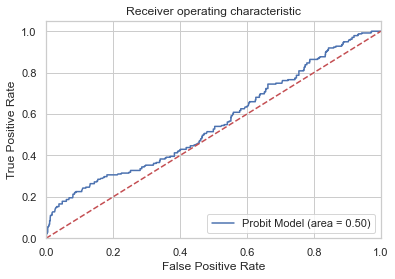

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
probit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Probit Model (area = %0.2f)' % probit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Probit_ROC')
plt.show()